In [1]:
import numpy as np
import pandas as pd

In [2]:
# Install scikit-learn beforehand
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

In [3]:
# Get data from https://lazyprogrammer/me/course_files/SPY.csv
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [5]:
df['ClosePrediction'] = df['Close'].shift(1)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,ClosePrediction
Date,,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600,NaN
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900,113.330002
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400,113.629997
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100,113.709999
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800,114.190002


In [7]:
y_true = df.iloc[1:]['Close']
y_pred = df.iloc[1:]['ClosePrediction']

In [8]:
y_true.head()

Date
2010-01-05    113.629997
2010-01-06    113.709999
2010-01-07    114.190002
2010-01-08    114.570000
2010-01-11    114.730003
Name: Close, dtype: float64

In [9]:
y_pred.head()

Date
2010-01-05    113.330002
2010-01-06    113.629997
2010-01-07    113.709999
2010-01-08    114.190002
2010-01-11    114.570000
Name: ClosePrediction, dtype: float64

### Metrics

Main idea: get a feel for how the values relate to one another. What's "good"? What's "bad"? If the $R^2$ is "good", will the MAE also be "good"?

### Sum of squared errors (SSE)

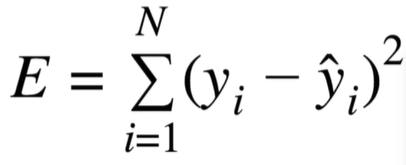

In [10]:
#SSE
(y_true - y_pred).dot(y_true - y_pred)

6330.374289492605

### Mean squared error (MSE)

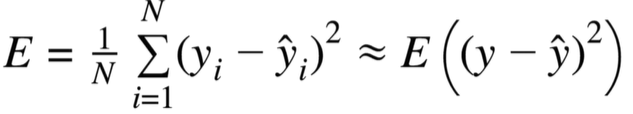

In [11]:
#MSE
mean_squared_error(y_true,y_pred)

2.798573956451196

In [12]:
#MSE again
#Don't be afraid to implement things yourself!
(y_true - y_pred).dot(y_true - y_pred)/ len(y_true)

2.798573956451196

In [13]:
#Size of data
len(y_true)

2262

### Root mean square error (RMSE)

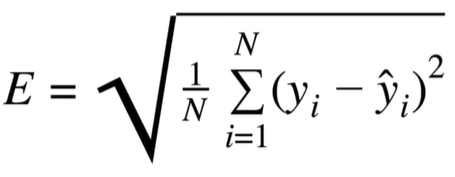

In [15]:
#RMSE
mean_squared_error(y_true,y_pred, squared=False)

1.672893886787562

In [16]:
#RMSE again
np.sqrt((y_true - y_pred).dot(y_true - y_pred)/ len(y_true))

1.672893886787562

### Mean Absolute Error (MAE)

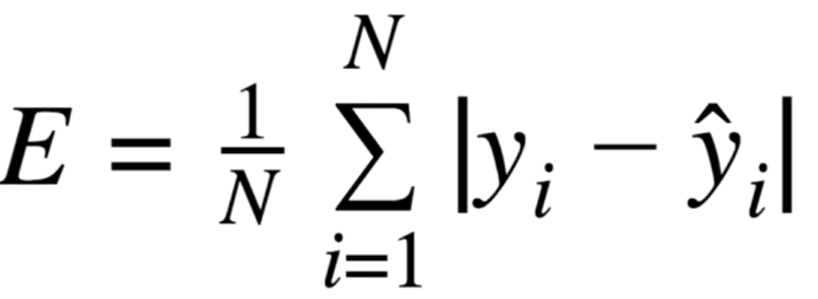

In [17]:
mean_absolute_error(y_true,y_pred)

1.1457559803120336

### R Score

In [19]:
r2_score(y_true,y_pred)

0.9989603259063914

- It turns out that our naive forecast gets an $R^2$ of 0.999
- This kind of makes sense since stock prices dont vary that wildly from one day to the next
- So predicting the last value in the series should give us pretty good predictors
- However, in another sense, these are also very bad predictions because they are really just the dumbest predictions possible
- Lesson: if you see a model that happens to predict stock prices very well, dont assume that such a model is actually useful

### Symmetric Mean Absolute Percentage Error (sMAPE)

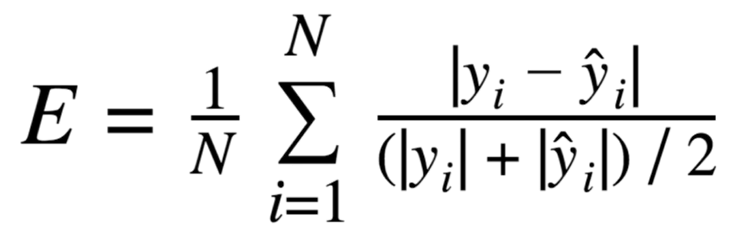

In [26]:
#sMAPE
# not implemented

def smape(y_true,y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    ratio = numerator / denominator
    return ratio.mean()

In [27]:
smape(y_true,y_pred)

0.0